In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


### Load the datasets 

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

### Let's look at the shape and few example records

In [3]:
print('Train contains %d rows and %d columns'%(train.shape[0],train.shape[1]))
print('Test contains %d rows and %d columns'%(test.shape[0],test.shape[1]))

Train contains 42000 rows and 785 columns
Test contains 28000 rows and 784 columns


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Seperate the label column 

In [6]:
train_data = train.drop(['label'],axis=1)
train_label = train[['label']]

### From the columns, it looks like the images are 28*28 pixels. Lets convert the data to numpy array and reshape the data

In [7]:
train_img = np.array(train_data).reshape(-1,28,28,1)
test_img = np.array(test).reshape(-1,28,28,1)

In [8]:
print(train_img.shape,test_img.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


### Let's print few images and check 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

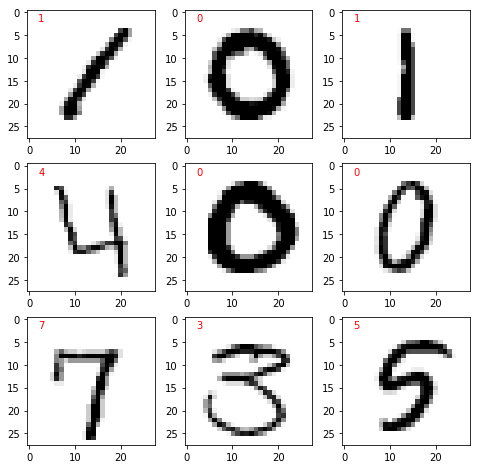

In [10]:
fig, ax = plt.subplots(3,3,figsize = (8,8))
for i, j in enumerate(ax.flat):
    j.imshow(train_img[i][:,:,0], cmap ='binary')
    j.text(2,2,str(train_label.label[i]),color = 'red')

### Data Augmentation

In [11]:
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


### Training a CNN model

In [12]:
batch_size = 32
np_classes = 10
nb_epoch = 10
#Normalize the data
x_train = train_img.astype('float')
x_test = test_img.astype('float')
x_train /= 255
x_test /= 255

### Convert the label to categorical

In [13]:
from keras.utils import to_categorical
y_train = to_categorical(train_label, np_classes)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D,Conv2D, MaxPool2D

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', input_shape = (28,28,1),activation='relu'))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(Conv2D(filters=64, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(np_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        8256      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        16448     
__________

In [18]:
model.fit(x_train, y_train,batch_size = batch_size, epochs = nb_epoch, shuffle = True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42000/42000 [==============================] - 13s 300us/step - loss: 0.3265 - acc: 0.9101
Epoch 2/10
42000/42000 [==============================] - 11s 256us/step - loss: 0.1566 - acc: 0.9554
Epoch 3/10
42000/42000 [==============================] - 10s 236us/step - loss: 0.1229 - acc: 0.9641
Epoch 4/10
42000/42000 [==============================] - 10s 235us/step - loss: 0.1169 - acc: 0.9653
Epoch 5/10
42000/42000 [==============================] - 10s 235us/step - loss: 0.1116 - acc: 0.9689
Epoch 6/10
42000/42000 [==============================] - 10s 234us/step - loss: 0.1062 - acc: 0.9698
Epoch 7/10
42000/42000 [==============================] - 10s 233us/step - loss: 0.1023 - acc: 0.9720
Epoch 8/10
42000/42000 [==============================] - 10s 234us/step - loss: 0.1040 - acc: 0.9716
Epoch 9/10
42000/42000 [==============================] - 10s 234us/step - loss: 0.1004 - acc: 0.9723
Epoch 10/10
42000/42000 [=========

In [19]:
pred = model.predict_classes(x_test).reshape(-1).astype(np.int8)

In [20]:
submis = pd.read_csv('../input/sample_submission.csv')

In [21]:
submis['Label'] = pred

In [22]:
submis.to_csv('digit_recog_v1.csv', index=False)